In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#
# load the data
#
df = pd.read_csv('../Datasets/synth_temp.csv')

In [3]:
#
# slice 1902 and forward
#
df = df.loc[df.Year > 1901]

In [5]:
#
# roll up by year
#
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp' : 'mean'})
#
df_group_year.head(12)

,RgnAvTemp
Year,
1902,17.385044
1903,17.222163
1904,17.217215
1905,17.817502
1906,17.386445
1907,17.384588
1908,17.388942
1909,17.662632
1910,17.457570


In [6]:
#
# add the Year column so we can use that in a model
#
df_group_year['Year'] = df_group_year.index
df_group_year = df_group_year.rename(columns = {'RgnAvTemp' : 'AvTemp'})
df_group_year.head()

,AvTemp,Year
Year,,
1902,17.385044,1902
1903,17.222163,1903
1904,17.217215,1904
1905,17.817502,1905
1906,17.386445,1906


In [6]:
#
# construct the model and inspect results
#
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_group_year['Year'].values.reshape((-1, 1)),
                 df_group_year.AvTemp)
print('model slope = ', linear_model.coef_[0])
print('model intercept = ', linear_model.intercept_)
r2 = linear_model.score(df_group_year['Year'].values.reshape((-1, 1)),
                 df_group_year.AvTemp)
print('r squared = ', r2)

model slope =  0.02352237024970654
model intercept =  -27.88736502793287
r squared =  0.8438499294671093


In [7]:
#
# generate predictions for visualization
#
pred_X = df_group_year.loc[:, 'Year']
pred_Y = linear_model.predict(df_group_year['Year'].values.reshape((-1, 1)))

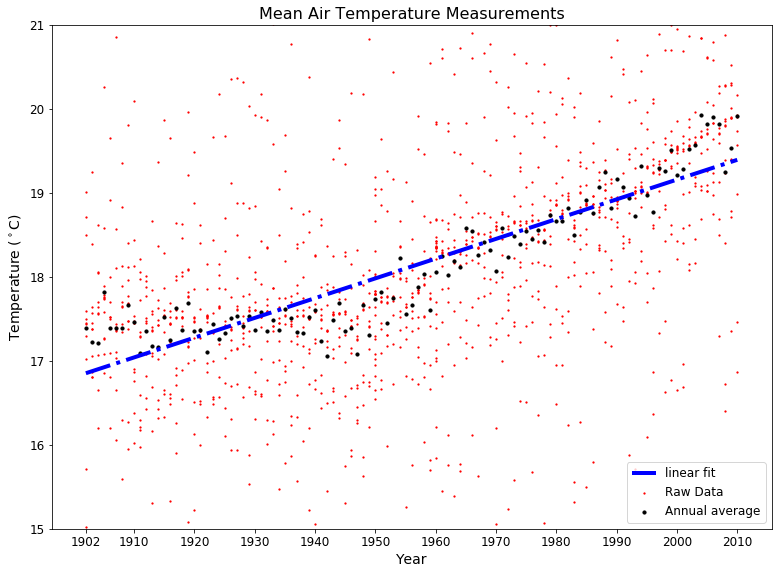

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red',
           s = 1.5)
#
# Annual averages
#
ax.scatter(df_group_year.Year, 
           df_group_year.AvTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)
#
# linear fit
#
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(15, 21)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)
plt.show()